In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy.signal import convolve, convolve2d
import os
import shutil
import re
from tqdm import tqdm
from PIL import Image
from skimage.color import rgb2gray, gray2rgb
from sklearn.model_selection import train_test_split
import h5py
from skimage import io
from skimage.transform import resize
from scipy.ndimage.filters import gaussian_filter

In [10]:
def extract_images(path, task, flag):
    """task = 1 : normal([0, 1]) vs pneumonia([1, 0])"""
    """task = 2 : bacterial([0, 1]) vs viral([1, 0])"""
    """flag = 0 : orginal"""
    """flag = 1 : blur"""
    x_train, y_train = [], []
    x_test, y_test = [], []
    for i in range(len(path)):
        # split train and test set
        if 'train' in path[i]:
            x_arr, y_arr = x_train, y_train
        else:
            x_arr, y_arr = x_test, y_test
        # encode category
        if task == 1:
            if 'NORMAL' in path[i]:
                c = [0, 1]
            else:
                c = [1, 0]
        if task == 2:
            if 'bacterial' in path[i]:
                c = [0, 1]
            else:
                c = [1, 0]
        file_list = [f for f in os.listdir(path[i]) if not f.startswith('.')] # ignore hidden files
        length = len(file_list)
        for j in tqdm(range(length)):
            image = io.imread(path[i] + '/' + file_list[j])
            image = resize(image, (224, 224), anti_aliasing = True)
            if flag == 1:
                image = gaussian_filter(input = image, sigma = 1)
            if len(image.shape) == 2:
                x_arr.append(image)
                y_arr.append(c)
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_test, y_test = np.array(x_test), np.array(y_test)
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)
    
    return (x_train, y_train, x_test, y_test)

In [11]:
def test_train_split(task, flag):
    """task = 1 : normal([0, 1]) vs pneumonia([1, 0])"""
    """task = 2 : bacterial([0, 1]) vs viral([1, 0])"""
    """flag = 0 : orginal"""
    """flag = 1 : blur"""
    if task == 1:
        path = ['/Users/inazeze/Desktop/chest_xray_original/train/NORMAL',
                '/Users/inazeze/Desktop/chest_xray_original/train/PNEUMONIA/bacterial',
                '/Users/inazeze/Desktop/chest_xray_original/train/PNEUMONIA/viral',
                '/Users/inazeze/Desktop/chest_xray_original/test/NORMAL',
                '/Users/inazeze/Desktop/chest_xray_original/test/PNEUMONIA/bacterial',
                '/Users/inazeze/Desktop/chest_xray_original/test/PNEUMONIA/viral']
    elif task == 2:
        path = ['/Users/inazeze/Desktop/chest_xray_original/train/PNEUMONIA/bacterial',
                '/Users/inazeze/Desktop/chest_xray_original/train/PNEUMONIA/viral',
                '/Users/inazeze/Desktop/chest_xray_original/test/PNEUMONIA/bacterial',
                '/Users/inazeze/Desktop/chest_xray_original/test/PNEUMONIA/viral']
    x_train, y_train, x_test, y_test = extract_images(path, task, flag)
    return (x_train, y_train, x_test, y_test)
                 

In [12]:
fileName = 'task1_original.h5'
x_train, y_train, x_test, y_test = test_train_split(1, flag = 0)
with h5py.File(fileName, "w") as hf:
    hf.create_dataset("x_train", data = x_train)
    hf.create_dataset("y_train", data = y_train)           
    hf.create_dataset("x_test", data = x_test)
    hf.create_dataset("y_test", data = y_test)   

100%|██████████| 148/148 [00:05<00:00, 26.09it/s]


(4949, 224, 224) (4949, 2)
(624, 224, 224) (624, 2)


In [13]:
fileName = 'task1_blurred.h5'
x_train, y_train, x_test, y_test = test_train_split(1, flag = 1)
with h5py.File(fileName, "w") as hf:
    hf.create_dataset("x_train", data = x_train)
    hf.create_dataset("y_train", data = y_train)           
    hf.create_dataset("x_test", data = x_test)
    hf.create_dataset("y_test", data = y_test)   

100%|██████████| 148/148 [00:05<00:00, 25.44it/s]


(4949, 224, 224) (4949, 2)
(624, 224, 224) (624, 2)


In [14]:
fileName = 'task2_original.h5'
x_train, y_train, x_test, y_test = test_train_split(2, flag = 0)
with h5py.File(fileName, "w") as hf:
    hf.create_dataset("x_train", data = x_train)
    hf.create_dataset("y_train", data = y_train)           
    hf.create_dataset("x_test", data = x_test)
    hf.create_dataset("y_test", data = y_test)

100%|██████████| 148/148 [00:05<00:00, 26.58it/s]


(3600, 224, 224) (3600, 2)
(390, 224, 224) (390, 2)


In [15]:
fileName = 'task2_blurred.h5'
x_train, y_train, x_test, y_test = test_train_split(2, flag = 1)
with h5py.File(fileName, "w") as hf:
    hf.create_dataset("x_train", data = x_train)
    hf.create_dataset("y_train", data = y_train)           
    hf.create_dataset("x_test", data = x_test)
    hf.create_dataset("y_test", data = y_test)

100%|██████████| 148/148 [00:05<00:00, 27.00it/s]


(3600, 224, 224) (3600, 2)
(390, 224, 224) (390, 2)


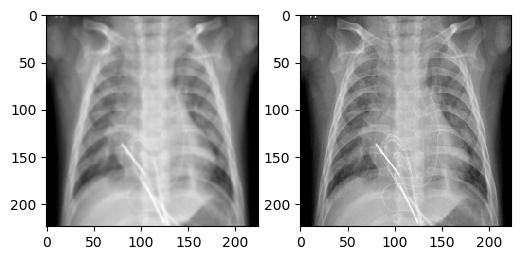

In [16]:
# show some examples

with h5py.File('task2_blurred.h5') as hf:
    x_train_b, y_train_b, x_test_b, y_test_b = hf['x_train'][:], hf['y_train'][:], hf['x_test'][:], hf['y_test'][:]

with h5py.File('task2_original.h5') as hf:
    x_train, y_train, x_test, y_test = hf['x_train'][:], hf['y_train'][:], hf['x_test'][:], hf['y_test'][:]
    
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_train_b[11], cmap = 'gray')
ax[1].imshow(x_train[11], cmap = 'gray')
plt.show()